In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction ##

In [4]:
HighPeaks = Table.read_table('HighPeaks.csv')
HighPeaks

Peak,Elevation,Difficulty,Ascent,Length,Time
Mt. Marcy,5344,5,3166,14.8,10
Algonquin Peak,5114,5,2936,9.6,9
Mt. Haystack,4960,7,3570,17.8,12
Mt. Skylight,4926,7,4265,17.9,15
Whiteface Mtn.,4867,4,2535,10.4,8.5
Dix Mtn.,4857,5,2800,13.2,10
Gray Peak,4840,7,4178,16,14
Iroquois Peak,4840,6,3250,11.6,8.5
Basin Mtn.,4827,6,3650,16.5,11
Gothics,4736,5,4070,10,9


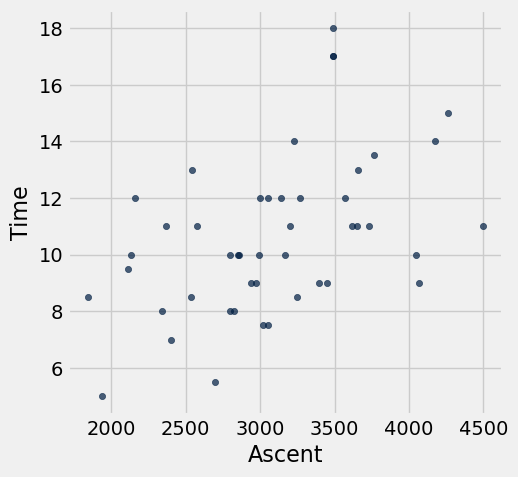

In [5]:
HighPeaks.scatter('Ascent', 'Time')

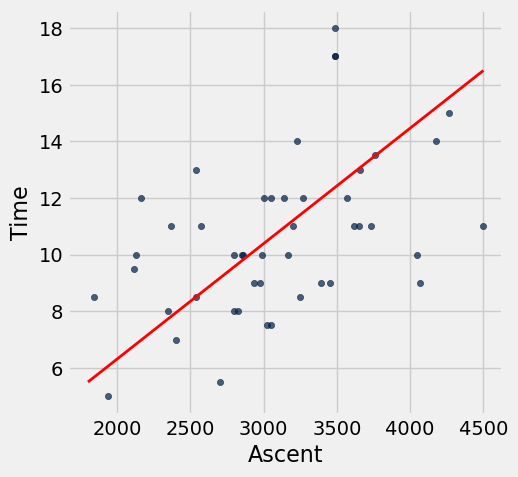

In [6]:
HighPeaks.scatter('Ascent', 'Time')

# My guess about a line that may describe the trend

plots.plot([1800,4500], [5.5,16.5], color='red', lw=2);

## Association ##

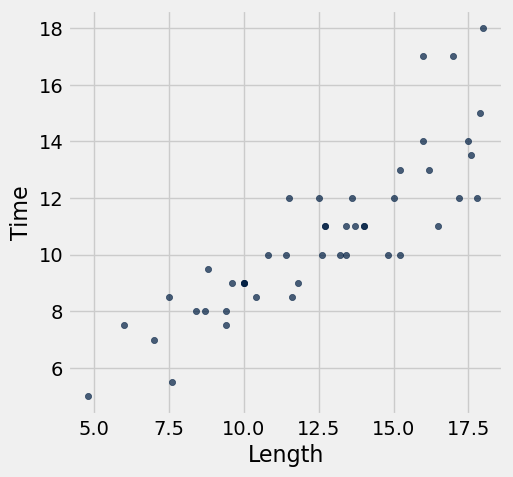

In [7]:
HighPeaks.scatter('Length', 'Time')

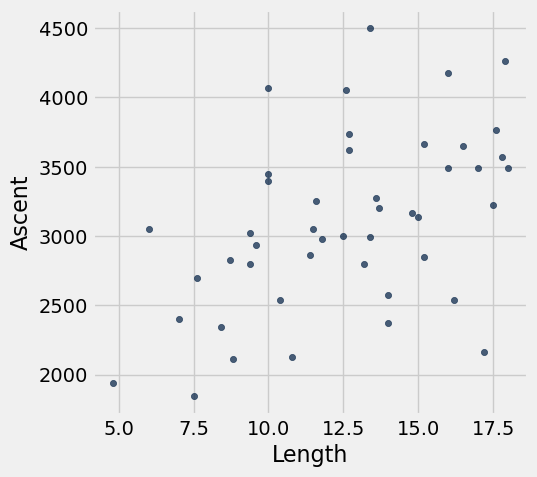

In [8]:
HighPeaks.scatter('Length', 'Ascent')

In [9]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

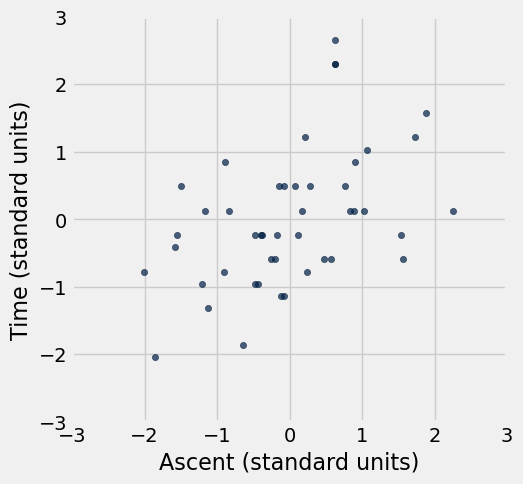

In [10]:
Table().with_columns(
    'Ascent (standard units)',  standard_units(HighPeaks.column('Ascent')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

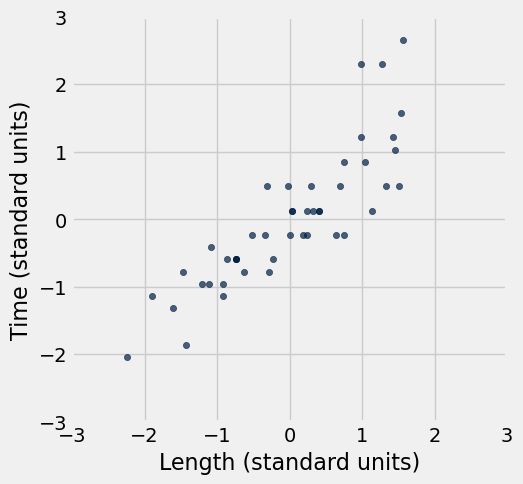

In [11]:
Table().with_columns(
    'Length (standard units)',  standard_units(HighPeaks.column('Length')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation ##

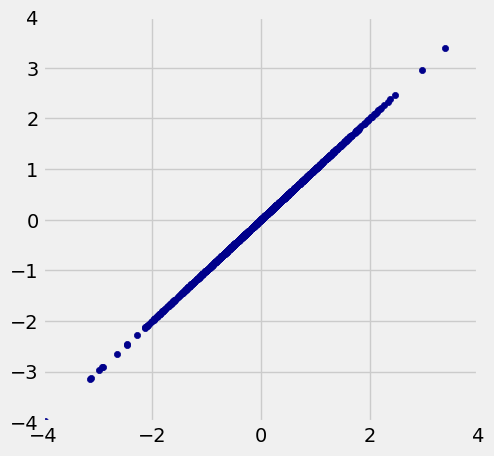

In [12]:
r_scatter(1)

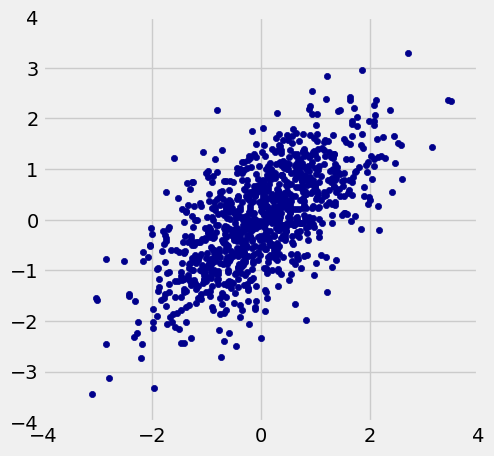

In [13]:
r_scatter(0.66)

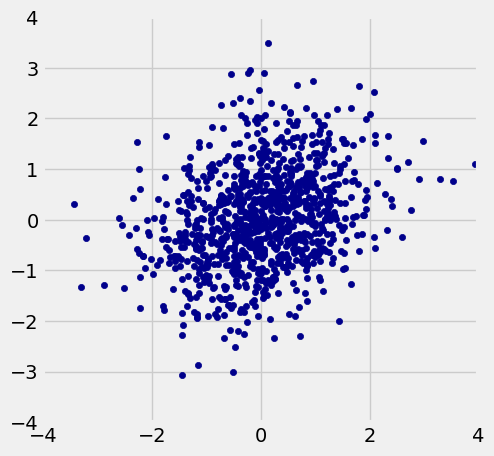

In [14]:
r_scatter(0.33)

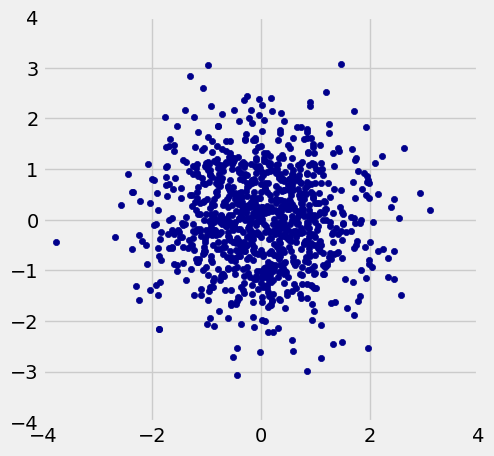

In [15]:
r_scatter(0)

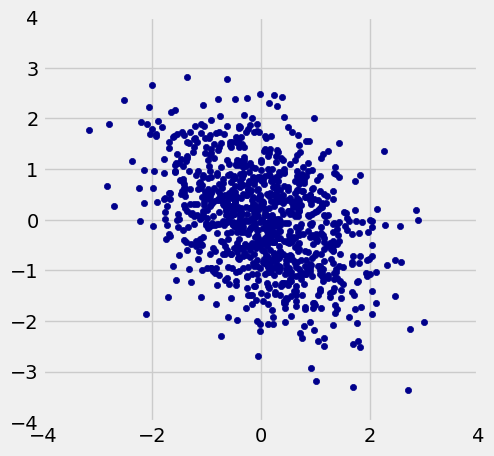

In [16]:
r_scatter(-0.33)

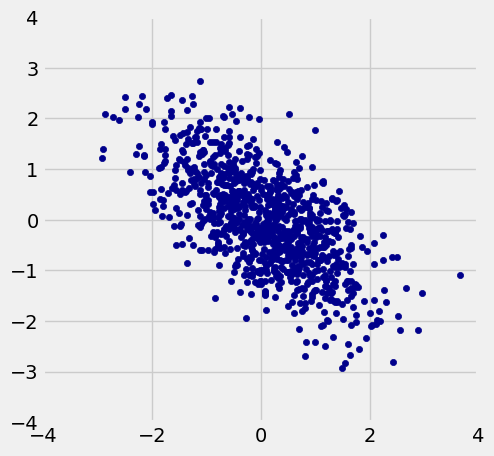

In [17]:
r_scatter(-0.66)

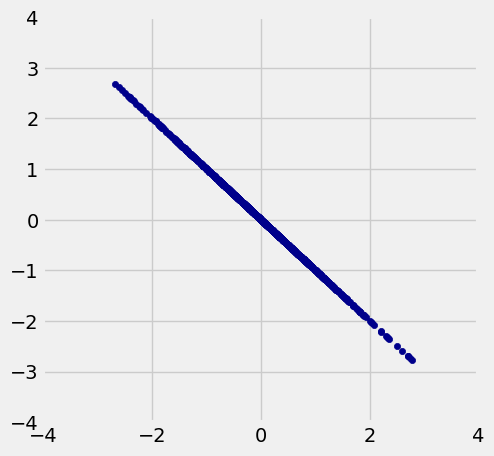

In [18]:
r_scatter(-1)

## Calculating $r$ ##

In [19]:
HighPeaks_AT = HighPeaks.select('Ascent', 'Time')
HighPeaks_AT

Ascent,Time
3166,10
2936,9
3570,12
4265,15
2535,8.5
2800,10
4178,14
3250,8.5
3650,11
4070,9


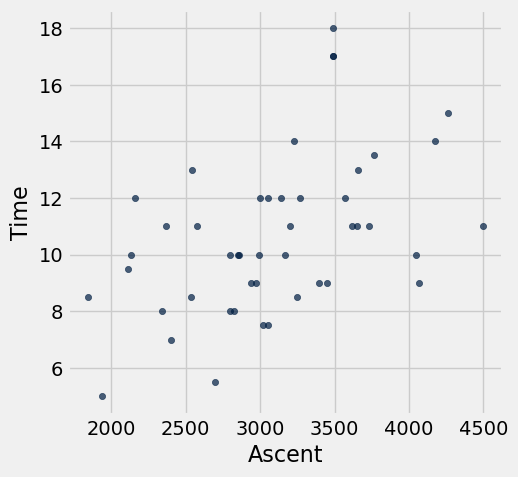

In [20]:
HighPeaks_AT.scatter('Ascent')

In [21]:
HighPeaks_AT = HighPeaks_AT.with_columns(
    'Ascent (standard units)',  standard_units(HighPeaks.column('Ascent')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
)

HighPeaks_AT

Ascent,Time,Ascent (standard units),Time (standard units)
3166,10,0.111747,-0.23595
2936,9,-0.257486,-0.59774
3570,12,0.760312,0.48763
4265,15,1.87604,1.573
2535,8.5,-0.901235,-0.778635
2800,10,-0.475814,-0.23595
4178,14,1.73637,1.21121
3250,8.5,0.246597,-0.778635
3650,11,0.888741,0.12584
4070,9,1.56299,-0.59774


In [22]:
HighPeaks_AT = HighPeaks_AT.with_columns(
    'product of standard units', HighPeaks_AT.column(2) * HighPeaks_AT.column(3))
HighPeaks_AT

Ascent,Time,Ascent (standard units),Time (standard units),product of standard units
3166,10,0.111747,-0.23595,-0.0263667
2936,9,-0.257486,-0.59774,0.153909
3570,12,0.760312,0.48763,0.370751
4265,15,1.87604,1.573,2.95101
2535,8.5,-0.901235,-0.778635,0.701733
2800,10,-0.475814,-0.23595,0.112268
4178,14,1.73637,1.21121,2.10311
3250,8.5,0.246597,-0.778635,-0.192009
3650,11,0.888741,0.12584,0.111839
4070,9,1.56299,-0.59774,-0.934262


In [23]:
# r is the average of the products of the standard units

r = np.average(HighPeaks_AT.column(2) * HighPeaks_AT.column(3))
r

0.46887529021391772

## Function for Calculating $r$ ##

In [24]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [25]:
correlation(HighPeaks, 'Ascent', 'Time')

0.46887529021391772

In [26]:
correlation(HighPeaks, 'Length', 'Time')

0.85850786456945893

In [27]:
correlation(HighPeaks, 'Length', 'Ascent')

0.48496918358745444

### Switching Axes ###

In [28]:
correlation(HighPeaks, 'Ascent', 'Time'), correlation(HighPeaks, 'Time', 'Ascent')

(0.46887529021391772, 0.46887529021391772)

### Nonlinearity ###

In [30]:
Tortoises = Table.read_table('Tortoises.csv')
Tortoises

CarapaceLength,NumEggs
284,3
290,2
290,7
290,7
298,11
299,12
302,10
306,8
306,8
309,9


In [31]:
correlation(Tortoises, 'CarapaceLength', 'NumEggs')

0.12157054742545714

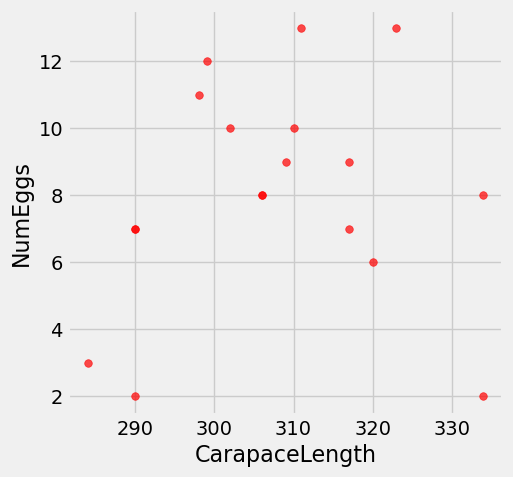

In [32]:
Tortoises.scatter('CarapaceLength', 'NumEggs', s=30, color='r')

### Outliers ###

In [33]:
PalmBeach = Table.read_table('PalmBeach.csv')
PalmBeach

County,Buchanan,Bush
ALACHUA,262,34062
BAKER,73,5610
BAY,248,38637
BRADFORD,65,5413
BREVARD,570,115185
BROWARD,789,177279
CALHOUN,90,2873
CHARLOTTE,182,35419
CITRUS,270,29744
CLAY,186,41745


In [34]:
correlation(PalmBeach, 'Buchanan', 'Bush')

0.62363943782225617

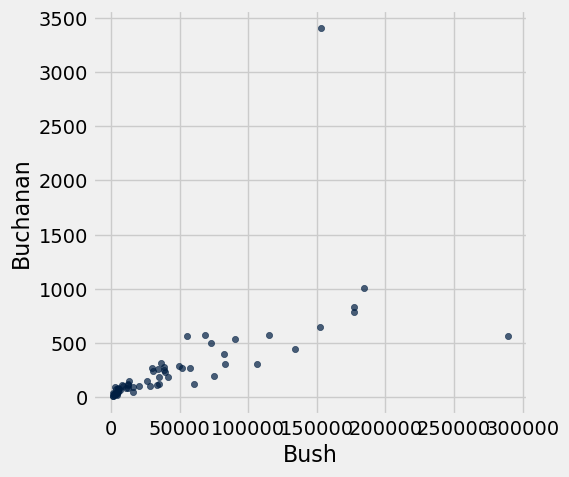

In [35]:
PalmBeach.scatter('Bush', 'Buchanan')

In [36]:
PalmBeach_removed = PalmBeach.where('County', are.not_containing('PALM BEACH'))

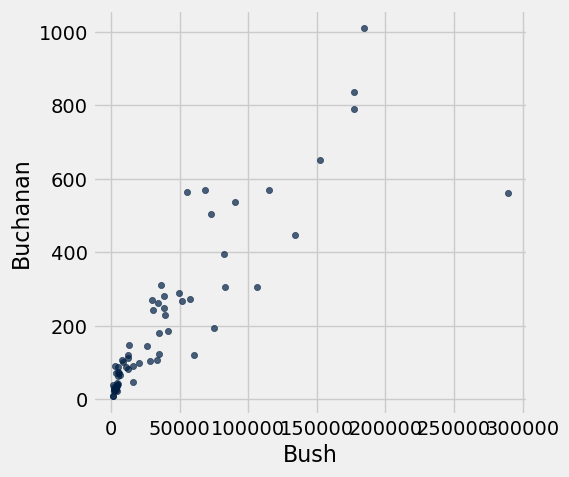

In [37]:
PalmBeach_removed.scatter('Bush', 'Buchanan')

In [38]:
correlation(PalmBeach_removed, 'Buchanan', 'Bush')

0.86705354875363239